In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
%matplotlib inline

In [2]:
#Loading the single csv file to a variable named 'placement'
placement=pd.read_csv("Placement_Data_Full_Class.csv")

In [3]:
placement_copy=placement.copy()
placement_copy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
print ("The shape of the  data is (row, column):"+ str(placement.shape))
print (placement_copy.info())

The shape of the  data is (row, column):(215, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None


In [5]:
placement_copy.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

<AxesSubplot:>

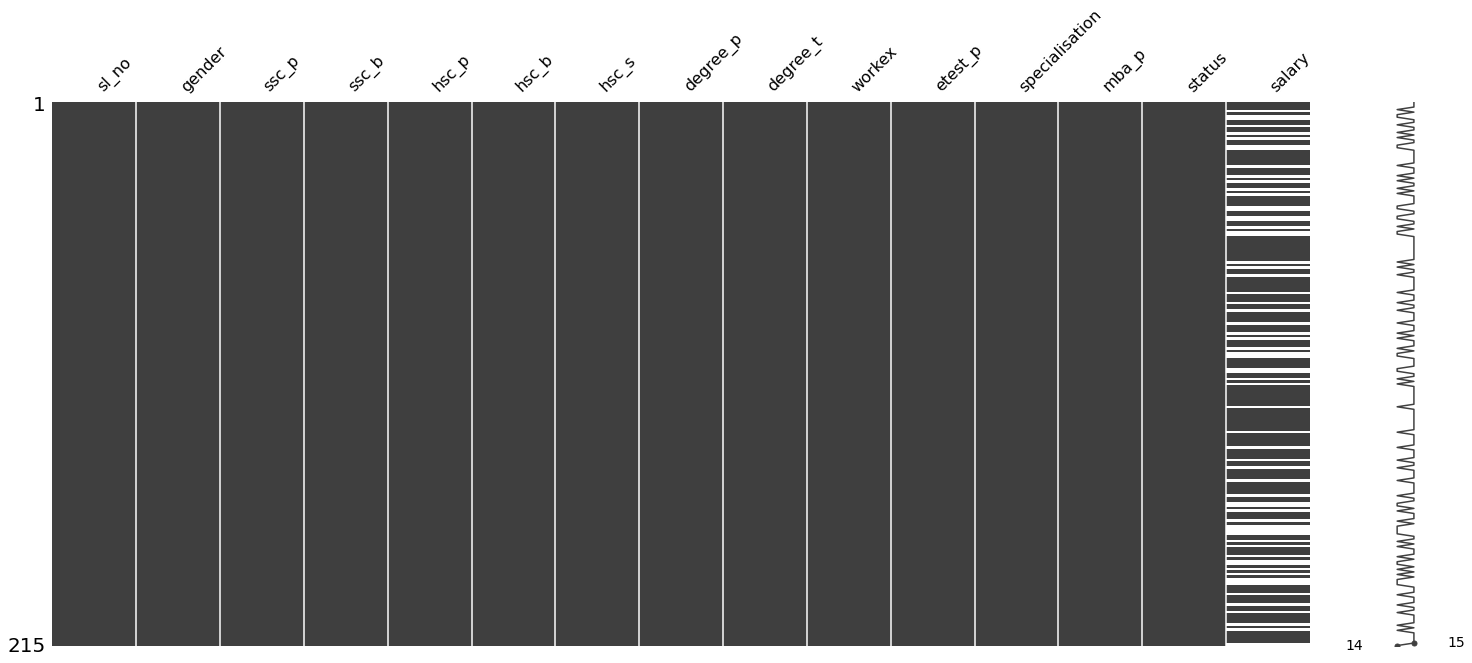

In [6]:
import missingno as msno 
msno.matrix(placement)

In [7]:
print('Data columns with null values:',placement_copy.isnull().sum(), sep = '\n')

Data columns with null values:
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [8]:
placement_copy['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:',placement_copy['salary'].isnull().sum(), sep = '\n')

Salary column with null values:
0


In [9]:
placement_copy.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True) 
placement_copy.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Text(0.5, 1.0, 'Employability percentage')

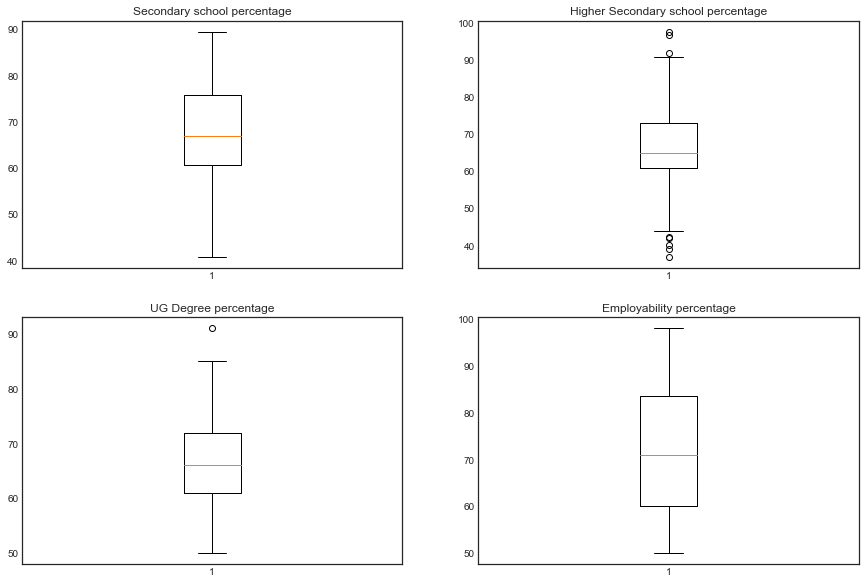

In [10]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(placement_copy['ssc_p'])
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
plt.boxplot(placement_copy['degree_p'])
ax.set_title('UG Degree percentage')
ax=plt.subplot(224)
plt.boxplot(placement_copy['etest_p'])
ax.set_title('Employability percentage')

In [11]:
Q1 = placement_copy['hsc_p'].quantile(0.25)
Q3 = placement_copy['hsc_p'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (placement_copy['hsc_p'] >= Q1 - 1.5 * IQR) & (placement_copy['hsc_p'] <= Q3 + 1.5 *IQR)
placement_filtered=placement_copy.loc[filter]

Text(0.5, 1.0, 'After removing outliers(hsc_p)')

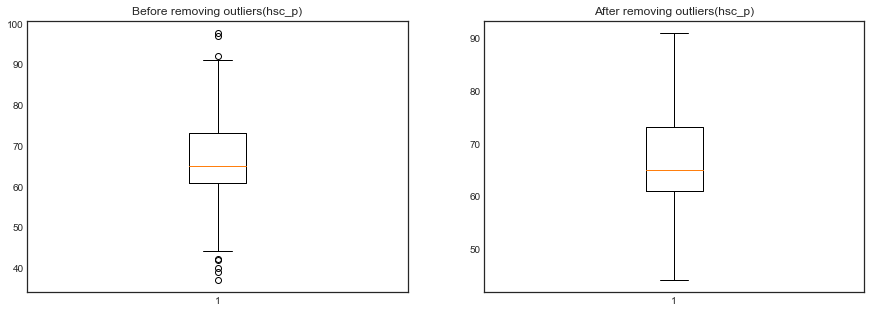

In [12]:
plt.figure(figsize = (15, 5))
plt.style.use('seaborn-white')
ax=plt.subplot(121)
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Before removing outliers(hsc_p)')
ax=plt.subplot(122)
plt.boxplot(placement_filtered['hsc_p'])
ax.set_title('After removing outliers(hsc_p)')

[Text(0, 0, 'Placed'), Text(1, 0, 'Not Placed')]

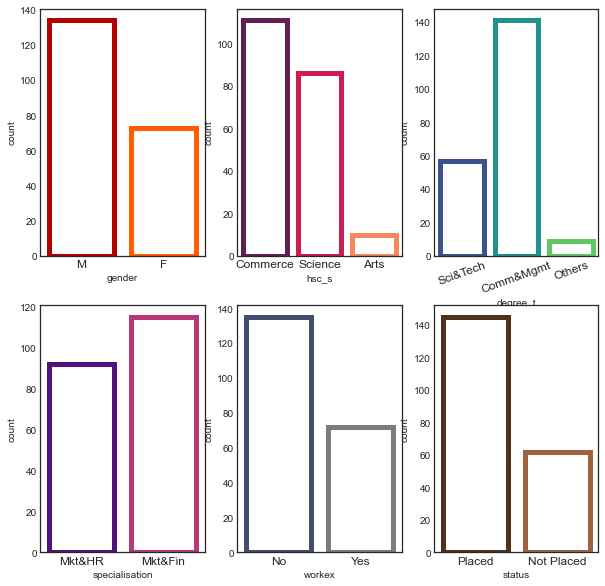

In [13]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

#Specialisation
plt.subplot(234)
ax=sns.countplot(x="specialisation", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("magma", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Work experience
plt.subplot(235)
ax=sns.countplot(x="workex", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("cividis", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Degree type
plt.subplot(233)
ax=sns.countplot(x="degree_t", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("viridis", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12,rotation=20)

#Gender
plt.subplot(231)
ax=sns.countplot(x="gender", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("hot", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Higher secondary specialisation
plt.subplot(232)
ax=sns.countplot(x="hsc_s", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("rocket", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Status of recruitment
plt.subplot(236)
ax=sns.countplot(x="status", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("copper", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

e:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
e:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, '')]

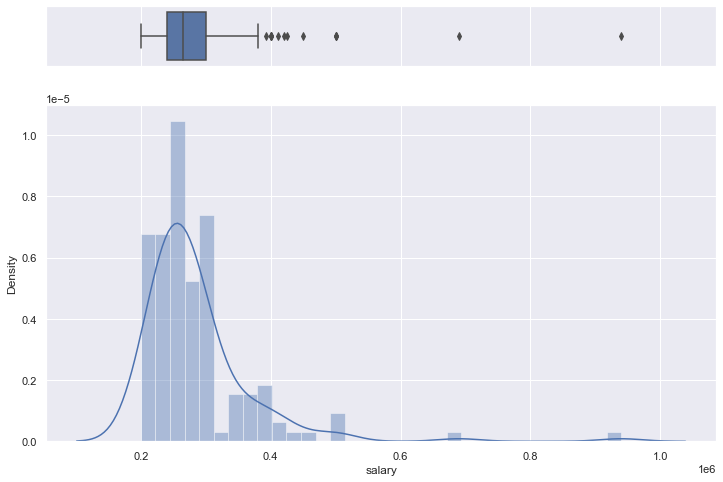

In [14]:
sns.set(rc={'figure.figsize':(12,8)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

placement_placed = placement_filtered[placement_filtered.salary != 0]
sns.boxplot(placement_placed["salary"], ax=ax_box)
sns.distplot(placement_placed["salary"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')


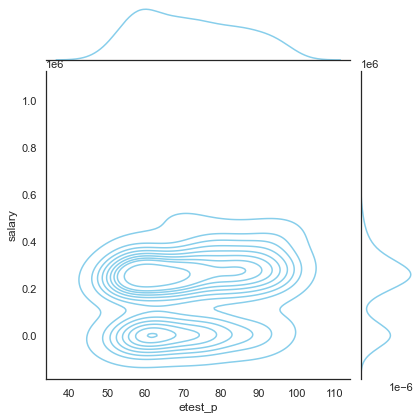

In [15]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=placement_filtered["etest_p"], y=placement_filtered["salary"], kind='kde', color="skyblue")

e:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

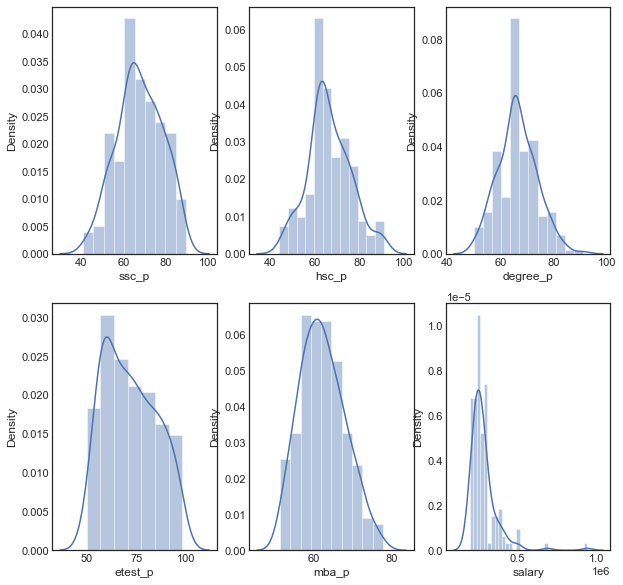

In [16]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(placement_filtered['ssc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(placement_filtered['hsc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(placement_filtered['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(placement_filtered['etest_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(placement_filtered['mba_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(placement_placed['salary'])
fig = plt.gcf()
fig.set_size_inches(10,10)

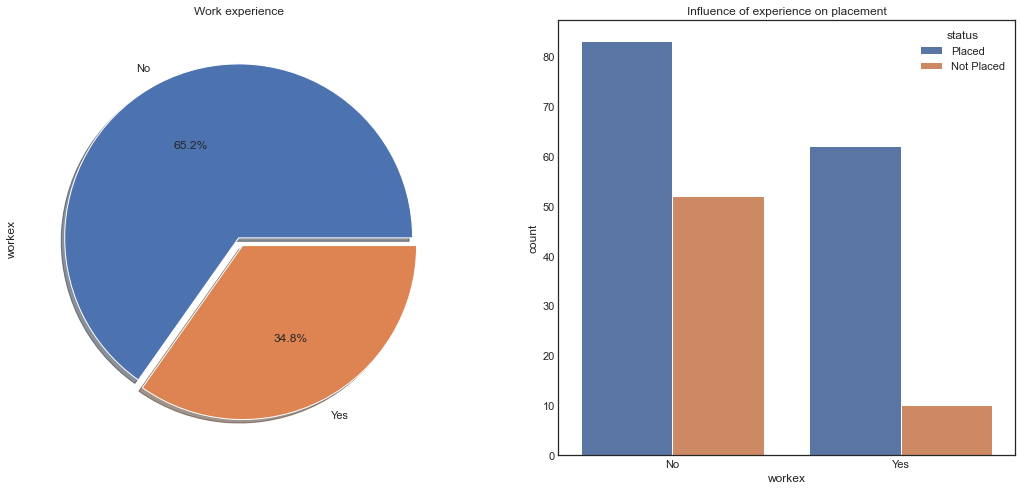

In [17]:
#Code forked from-https://www.kaggle.com/biphili/hospitality-in-era-of-airbnb
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
placement_filtered['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = placement_filtered)
ax[1].set_title('Influence of experience on placement')
plt.show()

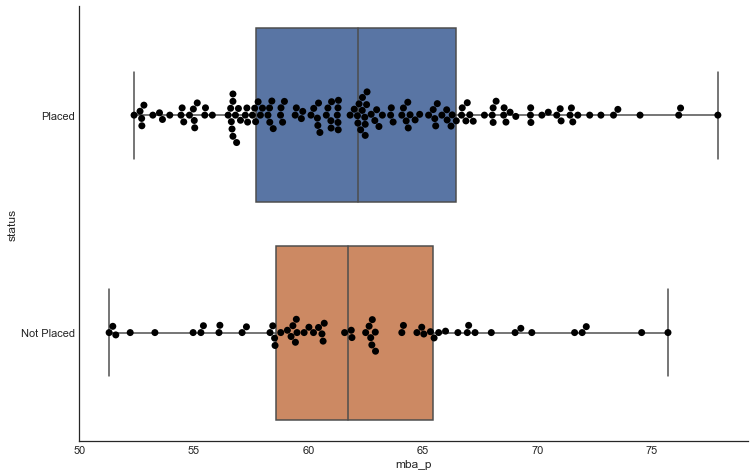

In [18]:
g = sns.boxplot(y = "status",x = 'mba_p',data = placement_filtered, whis=np.inf)
g = sns.swarmplot(y = "status",x = 'mba_p',data = placement_filtered, size = 7,color = 'black')
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

In [19]:
import plotly_express as px
gapminder=px.data.gapminder()
px.scatter(placement_filtered,x="mba_p",y="etest_p",color="status",facet_col="workex")

In [20]:
px.violin(placement_placed,y="salary",x="specialisation",color="gender",box=True,points="all")

<AxesSubplot:>

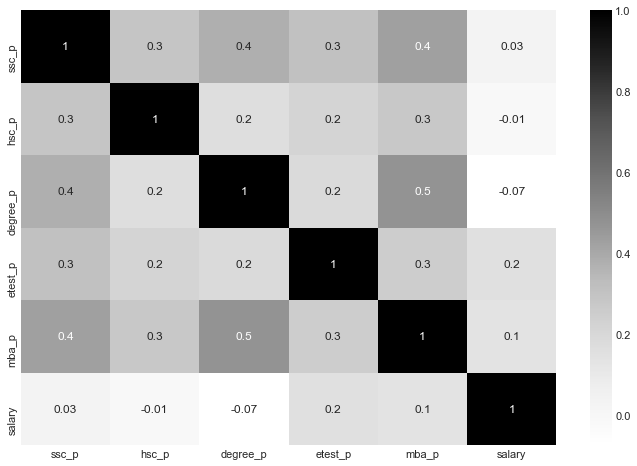

In [21]:
sns.heatmap(placement_placed.corr(),annot=True,fmt='.1g',cmap='Greys')

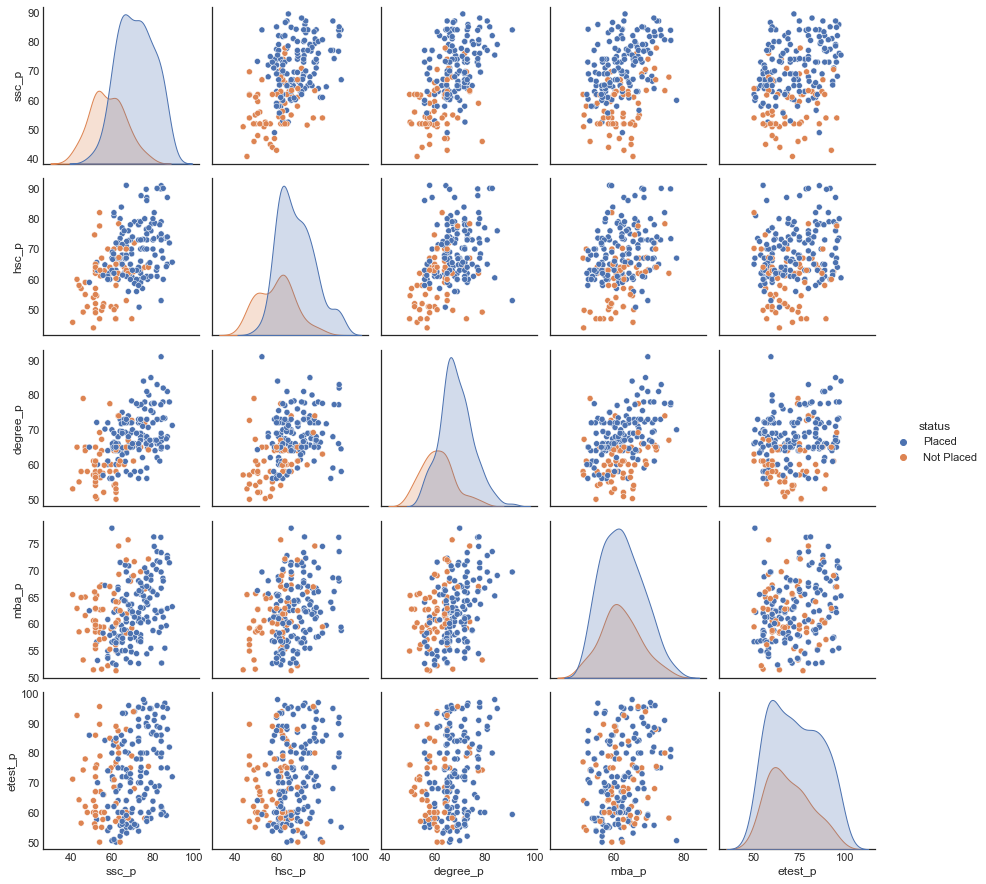

In [22]:
sns.pairplot(placement_filtered,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status")

In [23]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
object_cols=['gender','workex','specialisation','status']

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    placement_filtered[col] = label_encoder.fit_transform(placement_filtered[col])
placement_filtered.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [24]:
dummy_hsc_s=pd.get_dummies(placement_filtered['hsc_s'], prefix='dummy')
dummy_degree_t=pd.get_dummies(placement_filtered['degree_t'], prefix='dummy')
placement_coded = pd.concat([placement_filtered,dummy_hsc_s,dummy_degree_t],axis=1)
placement_coded.drop(['hsc_s','degree_t','salary'],axis=1, inplace=True)
placement_coded.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


In [25]:
feature_cols=['gender','ssc_p','hsc_p','hsc_p','workex','etest_p','specialisation','mba_p',
              'dummy_Arts','dummy_Commerce','dummy_Science','dummy_Comm&Mgmt','dummy_Others','dummy_Sci&Tech']
len(feature_cols)

14

In [26]:
X=placement_coded.drop(['status'],axis=1)
y=placement_coded.status

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (165, 14)
Input Test: (42, 14)
Output Training: (165,)
Output Test: (42,)


1 逻辑回归

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 9  6]
 [ 1 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.81      0.96      0.88        27

    accuracy                           0.83        42
   macro avg       0.86      0.78      0.80        42
weighted avg       0.84      0.83      0.82        42



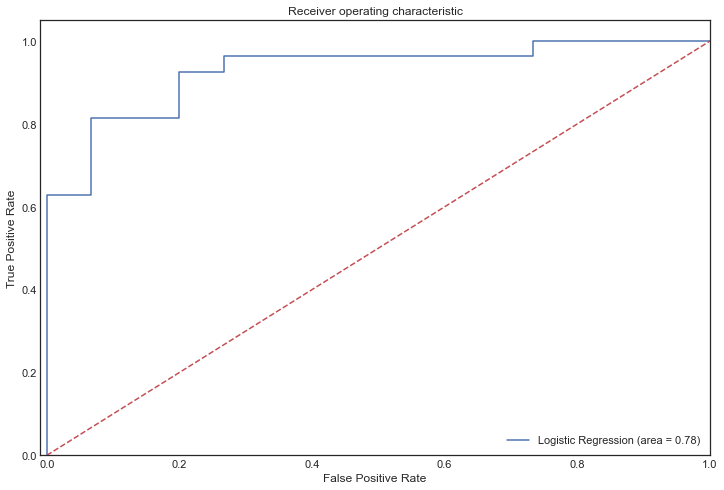

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

2 决策树

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="gini", max_depth=3)
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7380952380952381


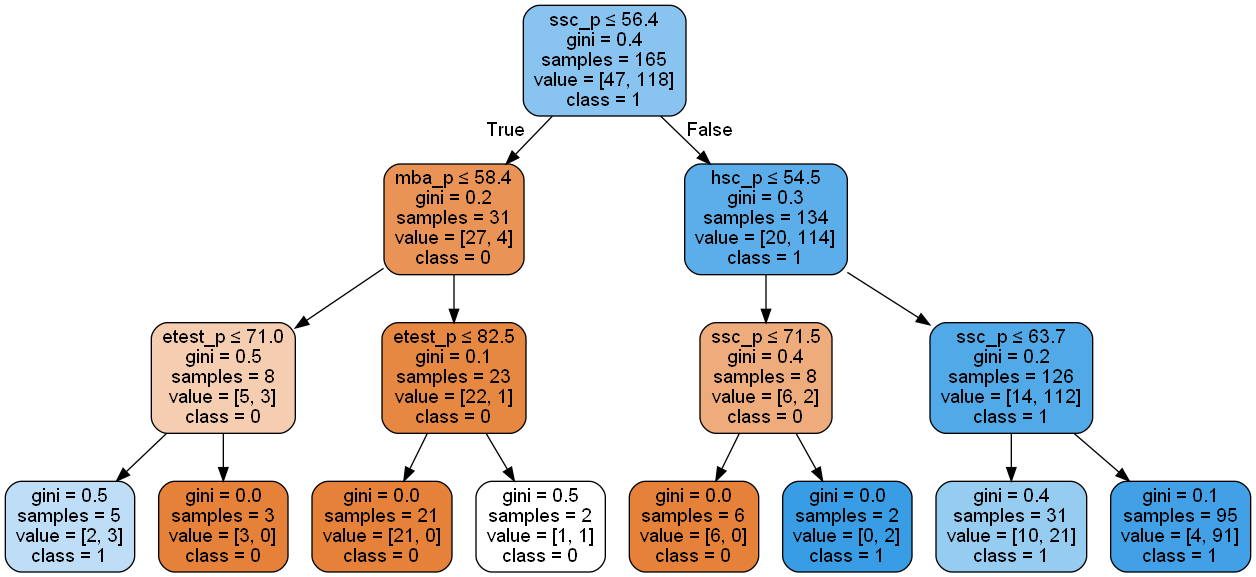

In [32]:
#from sklearn.externals.six import StringIO  
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'], precision=1)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

3 随机森林

In [33]:
from sklearn.ensemble import RandomForestClassifier
rt=RandomForestClassifier(n_estimators=100)
rt.fit(X_train,y_train)
y_pred=rt.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7857142857142857


Text(0.5, 1.0, 'Visualizing Important Features')

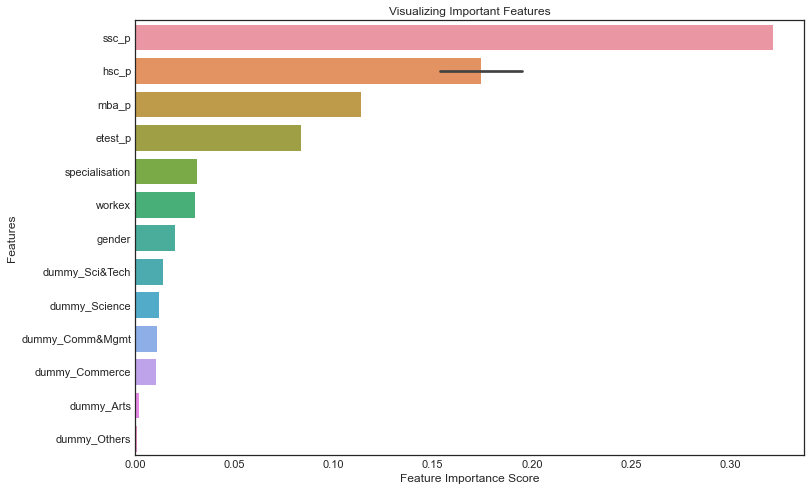

In [34]:
feature_imp = pd.Series(rt.feature_importances_,index=feature_cols).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

In [35]:
X=placement_coded.drop(['status','dummy_Comm&Mgmt','dummy_Sci&Tech','dummy_Science','dummy_Commerce',
                        'dummy_Arts','dummy_Others'],axis=1)
y=placement_coded.status
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
rt2=RandomForestClassifier(n_estimators=100)
rt2.fit(X_train,y_train)
y_pred=rt2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
roc_value = roc_auc_score(y_test, y_pred)
roc_value
print("ROC Value:",roc_value)

Accuracy: 0.8333333333333334
ROC Value: 0.7666666666666666


4 KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

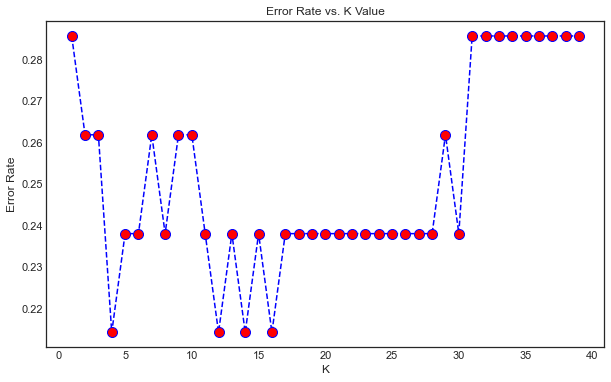

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [38]:
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 6  9]
 [ 1 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.40      0.55        15
           1       0.74      0.96      0.84        27

    accuracy                           0.76        42
   macro avg       0.80      0.68      0.69        42
weighted avg       0.78      0.76      0.73        42



5 朴素贝叶斯

In [39]:
#Importing and fitting
from sklearn.naive_bayes import BernoulliNB 
from sklearn.model_selection import cross_val_score
gnb = BernoulliNB() 
gnb.fit(X_train, y_train) 
  
#Applying and predicting 
y_pred = gnb.predict(X_test) 
cv_scores = cross_val_score(gnb, X, y, 
                            cv=10,
                            scoring='precision')
print("Cross-validation precision: %f" % cv_scores.mean())

Cross-validation precision: 0.735883


6 SVM

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
confusion_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test,y_pred))

Confusion Matrix:
 [[ 9  6]
 [ 2 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.81      0.93      0.86        27

    accuracy                           0.81        42
   macro avg       0.81      0.76      0.78        42
weighted avg       0.81      0.81      0.80        42



7 XGBoost

In [41]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xg_reg = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.577350


In [42]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
params = {"objective":"reg:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.488221,0.000409,0.489388,0.000788
1,0.479245,0.000928,0.480377,0.001536
2,0.473655,0.003031,0.475473,0.002697
3,0.464517,0.002080,0.467877,0.001208
4,0.458447,0.004250,0.463124,0.001352


8 MLP

In [81]:
from sklearn.neural_network import MLPClassifier
MLP=MLPClassifier(solver='adam', alpha=1e-2, hidden_layer_sizes=(200, 10), random_state=1)
MLP.fit(X_train,y_train)
score=MLP.score(X_test,y_test)
print(score)

0.8571428571428571


9 PAC

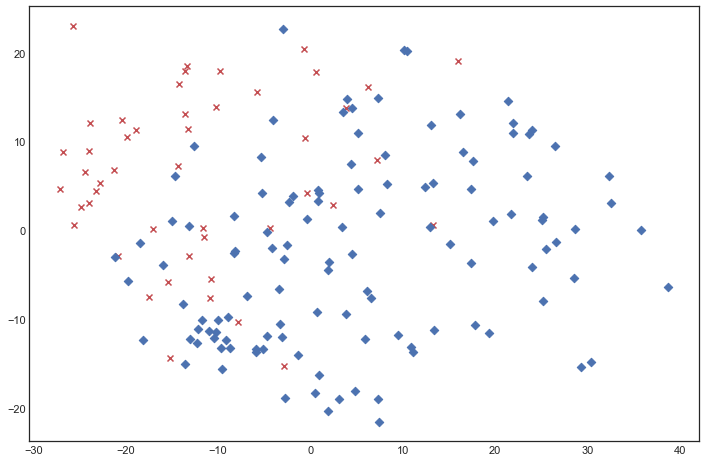

In [44]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x=pca.fit_transform(X_train)

red_x,red_y=[],[]
blue_x,blue_y=[],[]
green_x,green_y=[],[]


for i in range (len(x)):
    if y_train.iloc[i] ==0:
        red_x.append(x[i][0])
        red_y.append(x[i][1])

    else:
        blue_x.append(x[i][0])
        blue_y.append(x[i][1])

plt.scatter(red_x,red_y,c='r',marker='x')
plt.scatter(blue_x,blue_y,c='b',marker='D')
plt.scatter(green_x,green_y,c='g',marker='.')
plt.show()


10 AdaBoost

In [45]:
from sklearn.ensemble import  AdaBoostClassifier
adaBoost=AdaBoostClassifier()
adaBoost.fit(X_train,y_train)
score=adaBoost.score(X_test,y_test)
print(score)

0.8809523809523809
